In [1]:
from data_loader import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from keras.models import Model
from keras.layers import Dense, Embedding, Input, LSTM, Bidirectional, GlobalMaxPool1D, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import roc_auc_score

Using TensorFlow backend.


In [2]:
train = load_train_data("data/train.csv")

In [3]:
test_ids, test_texts, test_labels = load_test_data("data/test.csv", "data/test_labels.csv", False)

/Users/Zry/Desktop/2019Spring/MachineLearning/Project/data_loader.py:27: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  return data_frame['id'].tolist(), data_frame['comment_text'].tolist(), label_frame.iloc[:, 1:].as_matrix()


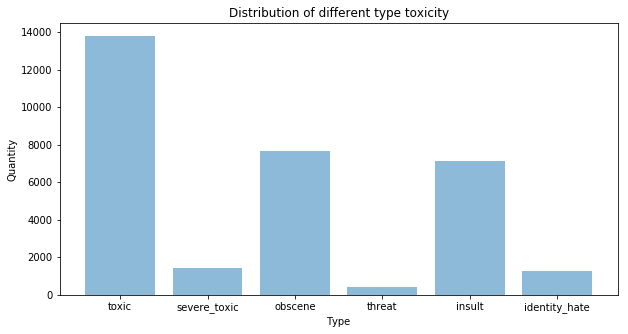

In [4]:
train_labels_sum = train[0].iloc[:,2:].sum()

%matplotlib inline
plt.figure(figsize=(10,5))
plt.title('Distribution of different type toxicity')
plt.ylabel('Quantity')
plt.xlabel('Type')

plt.bar(train_labels_sum.index, train_labels_sum.values, alpha = 0.5)
plt.show()

In [5]:
train_length = train[0].comment_text.apply(len)

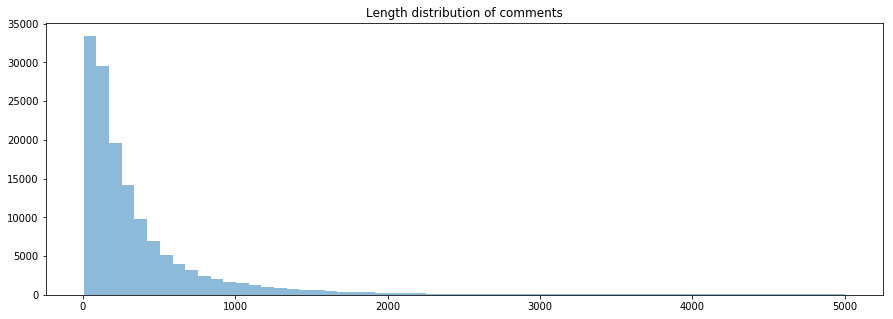

In [6]:
plt.figure(figsize = (15, 5))
plt.title("Length distribution of comments")
plt.hist(train_length, bins = 60, alpha = 0.5)
plt.show()

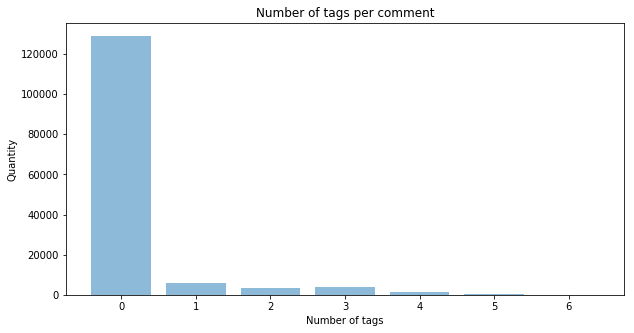

In [7]:
rowsums=train[0].iloc[:,2:].sum(axis=1)
x=rowsums.value_counts()

plt.figure(figsize=(10,5))
plt.title('Number of tags per comment')
plt.ylabel('Quantity')
plt.xlabel('Number of tags')
plt.bar(x.index, x.values, alpha = 0.5)
plt.show()

In [8]:
train_labels = train[0].iloc[:,2:]

In [10]:
main_col="toxic"
matrix = pd.crosstab(train_labels[main_col], train_labels[train_labels.columns[5]])